## 4.1 데이터셋

In [1]:
import pandas as pd

In [2]:
toks = 'Jeff Dean is a computer scientist at Google in California'.split()
lbls = ['B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'B-LOC']
df = pd.DataFrame(data=[toks, lbls], index=['Tokens', 'Tags'])
df

,0,1,2,3,4,5,6,7,8,9
Tokens,Jeff,Dean,is,a,computer,scientist,at,Google,in,California
Tags,B-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC


In [2]:
from datasets import get_dataset_config_names

In [4]:
xtreme_subsets = get_dataset_config_names('xtreme')
print(f'XTREME 서브셋 개수: {len(xtreme_subsets)}')

XTREME 서브셋 개수: 183


In [5]:
panx_subsets = [s for s in xtreme_subsets if s.startswith('PAN')]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [3]:
from datasets import load_dataset

In [7]:
# 독일어 말뭉치를 로드하려면 다음처럼 load_dataset() 함수의 name 매개변수에 독일어(de)에 해당하는 코드를 전달
load_dataset('xtreme', name='PAN-X.de')

Reusing dataset xtreme (/home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
})

In [4]:
from collections import defaultdict
from datasets import DatasetDict

In [5]:
langs = ['de', 'fr', 'it', 'en']
fracs = [0.629, 0.229, 0.084, 0.059]

# 키가 없는 경우 DatasetDict 를 반환
panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    # 다국어 말뭉치를 로드
    ds = load_dataset('xtreme', name=f'PAN-X.{lang}')
    # 각 분할을 언어 비율에 따라 다운샘플링하고 섞음
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows))))

Reusing dataset xtreme (/home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-7318edec81f76aa6.arrow
Parameter 'indices'=range(0, 6290) of the transform datasets.arrow_dataset.Dataset.select couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-cbd29dccd93ef58f.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN

  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-4a1996403248b4e2.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-5d4f9e5aefa05972.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-6789784a489dc7d6.arrow
Reusing dataset xtreme (/home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-845df155c04c1192.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-4038e5f0ccb7a363.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-e220bc62f3b2de61.arrow
Reusing dataset xtreme (/home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-2292d48c0b6f8502.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-56d73ebf7717cb83.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-5117c26f1eb0d215.arrow


In [6]:
pd.DataFrame({lang: [panx_ch[lang]['train'].num_rows] for lang in langs},
             index=['Number of training examples'])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [7]:
element = panx_ch['de']['train'][0]
for key, value in element.items():
    print(f'{key}: {value}')

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [8]:
for key, value in panx_ch['de']['train'].features.items():
    print(f'{key}: {value}')

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


Sequence 클래스는 이 필드가 특성 리스트를 담고 있음을 나타냄

ner_tags 의 경우 ClassLabel 의 리스트임

In [9]:
tags = panx_ch['de']['train'].features['ner_tags'].feature
print(tags)

ClassLabel(num_classes=7, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], names_file=None, id=None)


In [10]:
def create_tag_names(batch):
    return {'ner_tags_str': [tags.int2str(idx) for idx in batch['ner_tags']]}

In [27]:
panx_de = panx_ch['de'].map(create_tag_names)

  0%|          | 0/6290 [00:00<?, ?ex/s]

  0%|          | 0/6290 [00:00<?, ?ex/s]

  0%|          | 0/12580 [00:00<?, ?ex/s]

In [11]:
print(panx_de['train'][0])

{'tokens': ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.'], 'ner_tags': [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0], 'langs': ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de'], 'ner_tags_str': ['O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'B-LOC', 'B-LOC', 'I-LOC', 'O']}


In [12]:
de_example = panx_de['train'][0]
pd.DataFrame([de_example['tokens'], de_example['ner_tags_str']],
             ['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [11]:
from collections import Counter

In [9]:
split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
    for row in dataset['ner_tags_str']:
        for tag in row:
            if tag.startswith('B'):
                tag_type = tag.split('-')[1]
                split2freqs[split][tag_type] += 1
pd.DataFrame.from_dict(split2freqs, orient='index')

NameError: name 'panx_de' is not defined

## 4.2 다중 언어 트랜스포머

##### en

영어 훈련 데이터에서 미세 튜닝한 다음에 각 언어의 테스트 세트에서 평가

##### each

언어별 성능을 측정하기 위해 단일 언어의 테스트 세트에서 미세 튜닝하고 평가

##### all

모든 훈련 데이터에서 미세 튜닝해 각 언어의 테스트 세트에서 평가

## 4.3 XLM-R 토큰화

In [12]:
from transformers import AutoTokenizer

2023-01-26 20:38:01.935815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 20:38:02.440154: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2023-01-26 20:38:02.440206: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2023-01-26 20:38:02.440212: W tensorflow

In [13]:
bert_model_name = 'bert-base-cased'
xlmr_model_name = 'xlm-roberta-base'
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [17]:
text = 'Jack Sparrow loves New York!'
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [18]:
df = pd.DataFrame([bert_tokens, xlmr_tokens], index=['BERT', 'XLM-R'])
df

,0,1,2,3,4,5,6,7,8,9
BERT,[CLS],Jack,Spa,##rrow,loves,New,York,!,[SEP],None
XLM-R,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>


### 4.3.1 토큰화 파이프라인

<img alt="Tokenizer pipeline" caption="The steps in the tokenization pipeline" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter04_tokenizer-pipeline.png?raw=1" id="toknizer-pipeline"/>

##### 정규화

유니코드 정규화(https://oreil.ly/2cp3w)는 많은 토크나이저에서 적용하는 또 다른 일반적인 정규화 연산이며, 같은 문자를 쓰는 여러 가지 방식을 처리

같은 문자열(즉, 같은 추상문자의 시퀀스)의 두 버전이 다르게 표시될 수 있음

NFC, NFD, NFKC, NFKD 같은 유니코드 정규화 방식은 같은 문자를 쓰는 여러 방식을 표준 형식으로 대체

정규화의 또 다른 방식은 소문자로 바꾸는 것임

모델이 소문자만 받을 것으로 기대한다면 이 기법을 사용해 어휘사전의 크기를 줄일 수 있음

예시 문장을 정규화하면 'jack sparrow loves new york!' 형태가 됨

##### 사전 토큰화(pretokenization)

텍스트를 더 작은 객체로 분할하며 훈련 마지막에 생성되는 토큰의 상한선을 제공

사전 토큰화가 텍스트를 단어로 분할하고 최종 토큰은 이 단어의 일부가 된다고 생각하면 좋음

영어, 독일어, 많은 인도-유럽어족의 언어에서 문자열이 일반적으로 공백과 구두점을 기준 삼아 단어로 분할됨

예시 문장은 이 단계에서 ["jack", "sparrow", "loves", "new", "york", "!"]로 변환됨

이런 단어는 파이프라인 다음 단계에서 BPE(Byte-Pair Encoding)나 유니그램(Unigram) 알고리즘을 사용해 부분단어(Subword)로 분할하기 더 쉬움

하지만, 단어로 분할하는 것이 항상 간단하고 확실한 연산인 것은 아니고 타당성이 있는 연산도 아님

예를 들어, 중국어, 일본어, 한국어 같은 언어에서 인도-유럽어족 단어와 같은 의미 단위로 기호를 모으면 똑같이 유효한 여러 그룹이 만들어지는 비결정적 연산이 됨

이 경우 텍스트를 사전 토큰화하는 대신 언어별 사전 토큰화 라이브러리를 사용하는 것이 좋음

##### 토크나이저 모델

입력 텍스트 정규화와 사전 토큰화를 수행하고 난 후 토크나이저를 사용해 부분단어 분할 모델을 던어에 적용

토크나이저는 말뭉치로 훈련이 필요한 부분임(그렇지 않고 사전 훈련된 토크나이저를 사용한다면 이미 훈련된 상태로 볼 수 있음)

이 모델은 단어를 부분단어로 나눠 어휘사전의 크기와 OOV 토큰의 개수를 줄이는 역할을 함

부분단어 토큰화 알고리즘에는 BPE, 유니그램, WordPiece 등이 있음

예시 문장에 토크나이저 모델을 적용하면 [jack, spa, rrow, loves, new, york, !] 같이 됨

이 시점부터 더 이상 문자열 리스트가 아니라 정수(입력 ID) 리스트를 가지게 됨

이해하기 쉽게 단어는 그대로 두고 따옴표를 삭제해 이런 정수 변환을 나타내겠음

##### 사후 처리

토큰화 파이프라인의 마지막 단계로, 토큰 리스트에 부가적인 변환을 적용할 때도 있음

가령 입력 토큰 인덱스의 시퀀스 처음과 끝에 특수 토큰을 추가하는 경우임

BERT 스타일의 토크나이저는 분류 토큰(CLS)과 분할 토큰(SEP)을 추가해 토큰 리스트는 [CLS, jack, spa, rrow, loves, new, york, !, SEP] 형태가 됨

그다음 모델에 이 시퀀스(책에 쓰인 토큰이 아니라 정수의 시퀀스)를 주입함

### 4.3.2 SentencePiece 토크나이저

SentencePiece 토크나이저는 유니그램이라는 부분단어 분할 방식을 기반으로 각 입력 텍스트를 유니코드 문자 시퀀스로 인코딩 함

SentencePiece 가 악센트, 구두점에 대해 몰라도되므로 이 특징은 다국어 말뭉치에 특히 유용함

일본어 등의 많은 언어에 공백 문자가 있지 않다는 사실도 몰라도 됨

SentencePiece 의 또 다른 고유한 특징은 공백 문자가 유니코드 기호 U+2581 또는 아래 1/4 블록 문자(lower one quarter block character)라고도 하는 ▁ 할당 된다는 것임

따라서 SentencePiece 는 언어별 사전 토크나이저에 의존하지 않고 정확하게 시퀀스를 복원함

이전 절의 예시 문장을 다시 보면 WordPiece 는 "York!"와 "!" 사이에 공백이 없다는 정보를 잃어버림

이와 달리 SentencePiece 는 토큰화된 텍스트에 공백을 보존하기 때문에 정확하게 원시 텍스트로 다시 변환함

In [24]:
"".join(xlmr_tokens).replace(u'\u2581', ' ')

'<s> Jack Sparrow loves New York!</s>'

## 4.4 개체명 인식을 위한 트랜스포머

<img alt="Architecture of a transformer encoder for classification." caption="Fine-tuning an encoder-based transformer for sequence classification" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter04_clf-architecture.png?raw=1" id="clf-arch"/>

BERT 와 그 외 인코더 기반 트랜스포머는 NER 작업에 비슷한 방식을 사용함

다만, 모든 입력 토큰의 표현이 완전 연결 층에 주입되어 해당 토큰의 개체명을 인식함

이런 이유로 NER 을 종종 토큰 분류 작업으로 생각하기도 함

<img alt="Architecture of a transformer encoder for named entity recognition. The wide linear layer shows that the same linear layer is applied to all hidden states." caption="Fine-tuning an encoder-based transformer for named entity recognition" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter04_ner-architecture.png?raw=1" id="ner-arch"/>

## 4.5 트랜스포머 모델 클래스

### 4.5.1 바디와 헤드

<img alt="bert-body-head" caption="The `BertModel` class only contains the body of the model, while the `BertFor&lt;Task&gt;` classes combine the body with a dedicated head for a given task" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter04_bert-body-head.png?raw=1" id="bert-body-head"/>

### 4.5.2 토큰 분류를 위한 사용자 정의 모델 만들기

In [14]:
import torch.nn as nn

from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

In [15]:
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig
    
    def __init__(self, config):
        # RobertaPreTrainedModel 클래스의 초기화 함수를 호출
        # 이 추상 클래스는 사전 훈련된 가중치의 초기화나 로딩을 처리
        super().__init__(config)  
        self.num_labels = config.num_labels
        # 모델 바디를 로드합니다.
        # add_pooling_layer=False -> [CLS] 토큰에 해당하는 은닉 상태 외에 모든 은닉 상태가 반환되도록 함
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        # 토큰 분류 헤드를 준비합니다.
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        # 가중치를 로드하고 초기화합니다.
        # RobertaPreTrainedModel 클래스에서 상속된 init_weights() 메서드를 호출해 가중치를 초기화
        self.init_weights()
        
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,
                labels=None, **kwargs):
        # 모델 바디를 사용해 인코더 표현을 얻습니다.
        outputs = self.roberta(input_ids, attention_mask=attention_mask,
                               token_type_ids=token_type_ids, **kwargs)
        # 인코더 표현을 헤드에 통과시킵니다.
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        # 손실을 계산합니다
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        # 모델 출력 객체를 반환합니다.
        return TokenClassifierOutput(loss=loss, logits=logits,
                                     hidden_states=outputs.hidden_states,
                                     attentions=outputs.attentions)

### 4.5.3 사용자 정의 모델 로드하기

In [16]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [17]:
from transformers import AutoConfig

In [18]:
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                         num_labels=tags.num_classes,
                                         id2label=index2tag, label2id=tag2index)

In [19]:
xlmr_config

XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "O",
    "1": "B-PER",
    "2": "I-PER",
    "3": "B-ORG",
    "4": "I-ORG",
    "5": "B-LOC",
    "6": "I-LOC"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "B-LOC": 5,
    "B-ORG": 3,
    "B-PER": 1,
    "I-LOC": 6,
    "I-ORG": 4,
    "I-PER": 2,
    "O": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [20]:
import torch

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [32]:
xlmr_model = (XLMRobertaForTokenClassification
              .from_pretrained(xlmr_model_name, config=xlmr_config)
              .to(device))

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'roberta.e

In [33]:
input_ids = xlmr_tokenizer.encode(text, return_tensors='pt')
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=['Tokens', 'Input IDs'])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [34]:
outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)
print(f'시퀀스에 있는 토큰 개수: {len(xlmr_tokens)}')
print(f'출력 크기: {outputs.shape}')

시퀀스에 있는 토큰 개수: 10
출력 크기: torch.Size([1, 10, 7])


logits 의 크기는 [batch_size, num_tokens, num_tags]

In [35]:
tags.names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC']

In [36]:
predictions

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')

In [37]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,O,O,O,O,O,O,O,O,O,O


In [22]:
def tag_text(text, tags, model, tokenizer):
    # 토큰을 준비합니다.
    tokens = tokenizer(text).tokens()
    # 시퀀스를 입력 ID로 인코딩합니다.
    input_ids = tokenizer(text, return_tensors='pt').input_ids.to(device)
    # 가능한 일곱 개의 클래스에 대한 로짓을 출력합니다.
    outputs = model(input_ids)[0]
    # argmax 함수로 토큰마다 가장 가능성이 높은 클래스를 선택합니다.
    predictions = torch.argmax(outputs, dim=-1)
    # 데이터프레임으로 변환합니다.
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=['Tokens', 'Tags'])

## 4.6 NER 작업을 위해 텍스트 토큰화하기

In [39]:
words, labels = de_example['tokens'], de_example['ner_tags']

In [40]:
# is_split_into_words=True -> 입력 문장이 이미 단어로 나눠졌을 때 사용
tokenized_input = xlmr_tokenizer(de_example['tokens'], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'])
pd.DataFrame([tokens], index=['Tokens'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [41]:
# word_ids 는 각 부분단어를 words 리스트에 있는 해당 단어의 인덱스에 매핑한 것임
# 첫 번째 부분단어 '▁2.000' 는 인덱스 0이고, ('Einwohnern' 은 words 에 있는 두 번째 단어이므로)
# '▁Einwohner' 와 'n' 은 인덱스 1에 할당
# <s> 와 </s> 같은 특수 토큰은 None 에 매핑
# 이런 특수 토큰과 부분단어의 레이블을 -100으로 설정해 훈련하는 동안 마스킹처리함
word_ids = tokenized_input.word_ids()
print(word_ids)

[None, 0, 1, 1, 2, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, None]


In [42]:
pd.DataFrame([tokens, word_ids], index=['Tokens', 'Word IDs'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [43]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx
    
labels = [index2tag[l] if l != -100 else 'IGN' for l in label_ids]
index = ['Tokens', 'Word IDs', 'Label IDs', 'Labels']

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


> 부분단어 표현을 마스킹하기 위해 ID로 -100을 선택한 이유가 무엇일까?<br>파이토치에 있는 크로스 엔트로피 손실 클래스 torch.nn.CrossEntropy 의 ignore_index 속성 값이 -100이기 때문임<br>훈련하는 동안 이 인덱스는 무시됨<br>따라서, 연속된 부분단어에 해당하는 토큰을 무시하기 위해 이 인덱스를 사용함

In [23]:
def tokenize_and_align_labels(examples):
    tokenized_input = xlmr_tokenizer(examples['tokens'], truncation=True,
                                     is_split_into_words=True)
    
    labels = []
    for idx, label in enumerate(examples['ner_tags']):
        word_ids = tokenized_input.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_input['labels'] = labels
    return tokenized_input

In [24]:
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True,
                      remove_columns=['langs', 'ner_tags', 'tokens'])

In [48]:
panx_de_encoded = encode_panx_dataset(panx_ch['de'])

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

## 4.7 성능 측정

In [25]:
from seqeval.metrics import classification_report

In [48]:
y_true = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O'],
          ['B-PER', 'I-PER', 'O']]
y_pred = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'I-MISC', 'O'],
          ['B-PER', 'I-PER', 'O']]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [26]:
import numpy as np

In [27]:
def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []
    
    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # 레이블 IDs = -100 무시
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])
                
        labels_list.append(example_labels)
        preds_list.append(example_preds)
        
    return preds_list, labels_list

## 4.8 XLM-RoBERTa 미세 튜닝하기

In [28]:
from transformers import TrainingArguments

In [30]:
num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded['train']) // batch_size
model_name = f'{xlmr_model_name}-finetuned_panx_de'
training_args = TrainingArguments(
    output_dir=model_name,
    log_level='error',
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy='epoch',  # 에포크가 끝날 때마다 검증 세트에 대한 모델의 예측을 평가
    save_steps=1e6,  # 큰 수로 설정해 훈련 속도를 높임
    weight_decay=0.01,  # 가중치 감쇠 값을 조정
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True,
)

In [31]:
from huggingface_hub import notebook_login

In [32]:
notebook_login()

In [29]:
from seqeval.metrics import f1_score

In [30]:
def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions,
                                       eval_pred.label_ids)
    return {'f1': f1_score(y_true, y_pred)}

In [31]:
from transformers import DataCollatorForTokenClassification

In [32]:
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

텍스트 분류 작업과 달리, 레이블도 시퀀스이기 때문에 레이블 패딩이 필수임

레이블 시퀀스를 -100으로 패딩해 파이토치 손실 함수가 무시하도록 만듦

In [33]:
def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))

In [34]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [35]:
from transformers import Trainer

In [62]:
trainer = Trainer(model_init=model_init,
                  args=training_args,
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  train_dataset=panx_de_encoded['train'],
                  eval_dataset=panx_de_encoded['validation'],
                  tokenizer=xlmr_tokenizer)

/data/heerak/workspace/nlp-with-transformers/xlm-roberta-base-finetuned_panx_de is already a clone of https://huggingface.co/Heerak/xlm-roberta-base-finetuned_panx_de. Make sure you pull the latest changes with `repo.git_pull()`.


In [63]:
trainer.train()
trainer.push_to_hub(commit_message='Training completed!')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: raki-1203. Use `wandb login --relogin` to force relogin


/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,No log,0.160162,0.815769
2,0.216900,0.137224,0.840688
3,0.216900,0.133843,0.856496


Upload file pytorch_model.bin:   0%|          | 4.00k/1.03G [00:00<?, ?B/s]

Upload file training_args.bin: 100%|##########| 2.80k/2.80k [00:00<?, ?B/s]

Upload file runs/Jan12_16-24-33_k8s-master1/1673508285.1380572/events.out.tfevents.1673508285.k8s-master1.2213…

Upload file runs/Jan12_16-09-15_k8s-master1/events.out.tfevents.1673507758.k8s-master1.16984.0: 100%|#########…

Upload file runs/Jan12_16-24-33_k8s-master1/events.out.tfevents.1673508285.k8s-master1.22131.0:  82%|########2…

Upload file sentencepiece.bpe.model:   0%|          | 4.00k/4.83M [00:00<?, ?B/s]

Upload file runs/Jan12_16-09-15_k8s-master1/1673507758.4301186/events.out.tfevents.1673507758.k8s-master1.1698…

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/Heerak/xlm-roberta-base-finetuned_panx_de
   9c837ec..6143615  main -> main

To https://huggingface.co/Heerak/xlm-roberta-base-finetuned_panx_de
   6143615..1ca6a84  main -> main



'https://huggingface.co/Heerak/xlm-roberta-base-finetuned_panx_de/commit/6143615d4fb2dd94e3345731e82baa488b63957e'

In [67]:
df = pd.DataFrame(trainer.state.log_history)[['epoch', 'loss', 'eval_loss', 'eval_f1']]
df = df.rename(columns={'epoch': 'Epoch', 'loss': 'Training Loss', 'eval_loss': 'Validation Loss',
                        'eval_f1': 'F1'})
df['Epoch'] = df['Epoch'].apply(lambda x: round(x))
df['Training Loss'] = df['Training Loss'].ffill()
df[['Validation Loss', 'F1']] = df[['Validation Loss', 'F1']].bfill().ffill()
df.drop_duplicates()

,Epoch,Training Loss,Validation Loss,F1
0,1,NaN,0.160162,0.815769
1,2,0.2169,0.137224,0.840688
3,3,0.2169,0.133843,0.856496


In [70]:
text_de = 'Jeff Dean ist ein Informatiker bei Google in Kalifornien'
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


## 4.9 오류 분석

실패 유형

- 우연히 너무 많은 토큰을 마스킹하고 일부 레이블도 마스킹하여 제대로 훈련되는 것처럼 손실이 감소
- compute_metrics() 함수에 실제 성능을 과대평가하는 버그
- NER 에 0 클래스 또는 O 개체명이 일반 클래스처럼 포함될 때가 있음
    - 압도적인 다수 클래스이므로 정확도와 F1_Score 가 크게 왜곡될 수 있음

In [36]:
from torch.nn.functional import cross_entropy

In [37]:
def forward_pass_with_label(batch):
    # 리스트의 딕셔너리를 데이터 콜레이터에 적합한 딕셔너리의 리스트로 변환합니다.
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # 입력과 레이블을 패딩하고 모든 텐서를 장치에 배치합니다.
    batch = data_collator(features)
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    with torch.no_grad():
        # 데이터를 모델에 전달합니다.
        output = trainer.model(input_ids, attention_mask)
        # logit.size: [batch_size, sequence_length, classes]
        # 마지막 축을 따라 가장 큰 로짓 값을 가진 클래스를 선택합니다.
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # 배치 차원을 펼친 다음 토큰마다 손실을 계산합니다.
    loss = cross_entropy(output.logits.view(-1, 7),
                         labels.view(-1), reduction='none')
    # 배치 차원을 다시 만들고 넘파이 배열로 변환합니다.
    loss = loss.view(len(input_ids), -1).cpu().numpy()
    
    return {'loss': loss, 'predicted_label': predicted_label}

In [74]:
valid_set = panx_de_encoded['validation']
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

  0%|          | 0/197 [00:00<?, ?ba/s]

In [81]:
index2tag[-100] = 'IGN'
df['input_tokens'] = df['input_ids'].apply(lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))

df['predicted_label'] = df['predicted_label'].apply(lambda x: [index2tag[i] for i in x])
df['labels'] = df['labels'].apply(lambda x: [index2tag[i] for i in x])
df['loss'] = df.apply(lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
df.head(1)

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,"[1, 1, 1, 1, 1, 1, 1]","[0, 10699, 11, 15, 16104, 1388, 2]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.039769117, 0.0, 0.051853076, 0.0329597...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [83]:
# pandas.Series.explode() 함수를 사용하면 한 줄 코드로 리스트에 있는 각 원소를 하나의 행으로 만들 수 있음
df_tokens = df.apply(pd.Series.explode)
df_tokens

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,1,0,IGN,0.0,I-ORG,<s>
0,1,10699,B-ORG,0.039769,B-ORG,▁Ham
0,1,11,IGN,0.0,I-ORG,a
0,1,15,I-ORG,0.051853,I-ORG,▁(
0,1,16104,I-ORG,0.03296,I-ORG,▁Unternehmen
...,...,...,...,...,...,...
6289,1,5106,O,0.000382,O,▁''
6289,1,223660,B-PER,3.406774,B-LOC,▁Alabama
6289,1,5106,O,0.00042,O,▁''
6289,1,242,O,0.000301,O,▁'


In [85]:
df_tokens = df_tokens.query('labels != "IGN"')
df_tokens

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,1,10699,B-ORG,0.039769,B-ORG,▁Ham
0,1,15,I-ORG,0.051853,I-ORG,▁(
0,1,16104,I-ORG,0.03296,I-ORG,▁Unternehmen
0,1,1388,I-ORG,0.045156,I-ORG,▁)
1,1,56530,O,0.000529,O,▁WE
...,...,...,...,...,...,...
6289,1,242,O,0.000317,O,▁'
6289,1,5106,O,0.000382,O,▁''
6289,1,223660,B-PER,3.406774,B-LOC,▁Alabama
6289,1,5106,O,0.00042,O,▁''


In [86]:
df_tokens['loss'] = df_tokens['loss'].astype(float).round(2)
df_tokens

/tmp/ipykernel_22131/826091638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokens['loss'] = df_tokens['loss'].astype(float).round(2)


,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,1,10699,B-ORG,0.04,B-ORG,▁Ham
0,1,15,I-ORG,0.05,I-ORG,▁(
0,1,16104,I-ORG,0.03,I-ORG,▁Unternehmen
0,1,1388,I-ORG,0.05,I-ORG,▁)
1,1,56530,O,0.00,O,▁WE
...,...,...,...,...,...,...
6289,1,242,O,0.00,O,▁'
6289,1,5106,O,0.00,O,▁''
6289,1,223660,B-PER,3.41,B-LOC,▁Alabama
6289,1,5106,O,0.00,O,▁''


In [87]:
df_tokens.head(7)

,attention_mask,input_ids,labels,loss,predicted_label,input_tokens
0,1,10699,B-ORG,0.04,B-ORG,▁Ham
0,1,15,I-ORG,0.05,I-ORG,▁(
0,1,16104,I-ORG,0.03,I-ORG,▁Unternehmen
0,1,1388,I-ORG,0.05,I-ORG,▁)
1,1,56530,O,0.00,O,▁WE
1,1,83982,B-ORG,0.30,B-ORG,▁Luz
1,1,10,I-ORG,0.30,I-ORG,▁a


In [99]:
(
    df_tokens.groupby('input_tokens')[['loss']]
    .agg(['count', 'mean', 'sum'])
    .droplevel(level=0, axis=1)  # 멀티 컬럼을 삭제합니다.
    .sort_values(by='sum', ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁von,▁der,▁in,▁und,▁/,▁(,▁),▁'',▁die
count,6066,808,1388,989,1171,163,246,246,2898,860
mean,0.04,0.17,0.08,0.11,0.07,0.5,0.29,0.26,0.02,0.06
sum,215.67,138.93,109.86,107.61,82.46,81.09,71.87,64.87,61.02,49.11


이 리스트에는 몇가지 패턴이 보임
- 공백 토큰의 손실 총합이 가장 큼
    - 리스트에서 가장 많이 등장하는 토큰이므로 놀라운 일이 아님
    - 하지만, 평균 손실은 다른 토큰에 비해 훨씬 낮음
    - 모델이 이 토큰을 구분하는 데 큰 힘을 들이지 않는 다는 의미
- 'in', 'von', 'der', 'und' 같은 단어가 비교적 자주 등장
    - 개체명과 함께 등장하거나 개체명의 일부인 경우가 많아 모델이 혼동하기 쉬움
- 단어 시작 부분의 괄호, 슬래시, 대문자는 드물지만 평균 손실이 비교적 높음

In [100]:
(
    df_tokens.groupby('labels')[['loss']]
    .agg(['count', 'mean', 'sum'])
    .droplevel(level=0, axis=1)
    .sort_values(by='mean', ascending=False)
    .reset_index()
    .round(2)
    .T
)

,0,1,2,3,4,5,6
labels,B-ORG,I-LOC,I-ORG,B-LOC,B-PER,I-PER,O
count,2683,1462,3820,3172,2893,4139,43648
mean,0.61,0.57,0.48,0.32,0.27,0.17,0.03
sum,1641.94,828.05,1826.76,999.57,774.78,715.05,1433.56


B-ORG 의 평균 손실이 가장 높음

모델이 조직 이름의 시작 부분을 결정하기가 어렵다는 의미

In [38]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [39]:
def plot_confusion_matrix(y_true, y_preds, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('Normalized confusion matrix')
    plt.show()

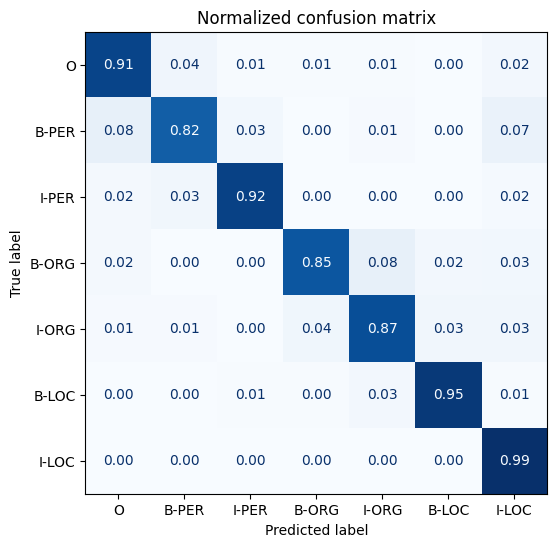

In [107]:
plot_confusion_matrix(df_tokens['labels'], df_tokens['predicted_label'],
                      tags.names)

그래프를 보면, 모델은 B-ORG 와 I-ORG 를 가장 많이 혼동하는 경향을 보임

그 외 개체명은 잘 분류한다는 것이 오차 행렬의 주대각선에 잘 나타남

In [40]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row['attention_mask']):
            if i not in {0, len(row['attention_mask'])}:
                labels.append(row['labels'][i])
                preds.append(row['predicted_label'][i])
                tokens.append(row['input_tokens'][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({'tokens': tokens, 'labels': labels, 
                               'preds': preds, 'losses': losses}).T
        yield df_tmp

In [111]:
df['total_loss'] = df['loss'].apply(sum)
df_tmp = df.sort_values(by='total_loss', ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,I-ORG,O,O,O,O,B-ORG,O,O,B-ORG,O,O,O,O,O,O,O
losses,0.00,0.00,2.84,0.00,0.00,0.00,9.99,8.85,6.13,6.65,7.43,0.00,6.90,6.88,0.00,6.96,7.50,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,8.42,0.00,0.00,5.94,7.61,7.76,5.78,0.00,7.29,8.07,6.34,2.79,1.95,0.00,0.00,0.02,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,4.81,4.80,5.05,0.00,5.00,0.00,4.88,0.00,4.55,4.74,4.87,4.81,4.63,4.45,0.00


In [112]:
df_tmp = df.loc[df['input_tokens'].apply(lambda x: u'\u2581(' in x)].head(2)
for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5
tokens,▁Ham,a,▁(,▁Unternehmen,▁),</s>
labels,B-ORG,IGN,I-ORG,I-ORG,I-ORG,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,0.04,0.00,0.05,0.03,0.05,0.00


,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,B-LOC,IGN,IGN,I-LOC,I-LOC,IGN,I-LOC,IGN
preds,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC
losses,0.06,0.00,0.00,0.04,0.04,0.00,0.03,0.00


## 4.10 교차 언어 전이

In [41]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics['test_f1']

In [114]:
f1_scores = defaultdict(dict)
f1_scores['de']['de'] = get_f1_score(trainer, panx_de_encoded['test'])
print(f"[de] 데이터셋에서 [de] 모델의 F1-점수: {f1_scores['de']['de']:.3f}")

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


[de] 데이터셋에서 [de] 모델의 $F_1$-점수: 0.864


ORG 개체명이 훈련 데이터에서 가장 적고 많은 조직명이 XLM-R 어휘사전에 드물기 때문에 모델이 ORG 개체명에서 가장 큰 어려움을 겪는 것 같음

다른 언어에서는 어떨까?

In [115]:
text_fr = 'Jeff Dean est informaticien chez Google en Californie'
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [42]:
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds['test'])

In [117]:
f1_scores['de']['fr'] = evaluate_lang_performance('fr', trainer)
print(f"[fr] 데이터셋에서 [de] 모델의 F1-점수: {f1_scores['de']['fr']:.3f}")

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


[fr] 데이터셋에서 [de] 모델의 F1-점수: 0.703


마이크로 평균 점수로 15% 포인트가 감소했지만, 이 모델은 레이블링된 프랑스어 샘플을 하나도 본 적이 없음

일반적으로 성능 감소의 폭은 언어 간 차이가 얼마나 큰지에 좌우됨

독일어와 프랑스어는 인도-유럽어족 언어로 묶이지만, 기술적으로 보면 서로 다른 언어파인 게르만어파와 로망스어군에 각각 속함

다음은 이탈리어에서 성능을 평가해보자

이탈리어도 로망스어군이니 프랑스어와 결과가 비슷하길 기대함

In [118]:
f1_scores['de']['it'] = evaluate_lang_performance('it', trainer)
print(f"[it] 데이터셋에서 [de] 모델의 F1-점수: {f1_scores['de']['it']:.3f}")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


[it] 데이터셋에서 [de] 모델의 F1-점수: 0.665


실제로 F1_score 가 이런 기대를 뒷받침 함

하지만 생각보다 크게 차이남

마지막으로 게르만어파에 속하는 영어에서 성능을 평가해보자

In [119]:
f1_scores['de']['en'] = evaluate_lang_performance('en', trainer)
print(f"[en] 데이터셋에서 [de] 모델의 F1-점수: {f1_scores['de']['en']:.3f}")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


[en] 데이터셋에서 [de] 모델의 F1-점수: 0.599


놀랍게도, 독일어가 프랑스어보다 영어와 더 가까우리라 예상하지만 오히려 모델 성능은 영어에서 가장 나쁨

여기서는 독일어에서 미세 튜닝하고 프랑스어와 영어에서 제로샷 전이 학습을 수행했음

다음으로 언제 타깃 언어에서 직접 미세 튜닝을 해야 합리적인지 살펴보자

### 4.10.1 제로샷 전이가 유용할 때

지금까지 독일어 말뭉치에서 미세 튜닝한 XLM-R 이 약 85%의 F1-점수를 얻고, 추가 훈련 없이 다른 언어 말뭉치에서 제법 좋은 성능을 달성했음

이 결과가 얼마나 좋은 것일까?

이 결과를 단일 언어에서 미세 튜닝한 XLM-R 모델과 어떻게 비교할까?

이 절에서는 프랑스어 말뭉치로 훈련 세트의 크기를 증가시키면서 XLM-R 을 미세튜닝해 독일어 XLM-R 로 교차 언어 전이한 것보다 나은 결과를 내는 훈련 세트 크기를 구하겠음

이는 실제로 레이블링된 데이터를 더 많이 수집해야 하는지 판단하는 데 유용

In [43]:
def train_on_subset(dataset, num_samples):
    train_ds = dataset['train'].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset['validation']
    test_ds = dataset['test']
    training_args.logging_steps = len(train_ds) // batch_size
    
    trainer = Trainer(model_init=model_init, args=training_args,
                      data_collator=data_collator, compute_metrics=compute_metrics,
                      train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message='Training completed!')
        
    f1_score = get_f1_score(trainer, test_ds)
    
    del trainer
    torch.cuda.empty_cache()
    return pd.DataFrame.from_dict(
        {'num_samples': [len(train_ds)], 'f1_score': [f1_score]})

In [48]:
panx_fr_encoded = encode_panx_dataset(panx_ch['fr'])

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [57]:
training_args.push_to_hub = False
training_args.per_device_train_batch_size = 12
training_args.per_device_eval_batch_size = 12

In [58]:
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-08682116ec76fd6b.arrow
/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,1.568800,1.291263,0.007153
2,1.183800,1.089224,0.175157
3,1.044600,1.005860,0.202144


,num_samples,f1_score
0,250,0.197127


In [59]:
for num_samples in [500, 1000, 2000, 4000]:
    metrics_df = metrics_df.append(
        train_on_subset(panx_fr_encoded, num_samples), ignore_index=True)

Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-08682116ec76fd6b.arrow
/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,1.372100,0.955079,0.293774
2,0.819500,0.636508,0.598656
3,0.506700,0.539420,0.669741


/tmp/ipykernel_31859/334256818.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-08682116ec76fd6b.arrow


Epoch,Training Loss,Validation Loss,F1
1,1.116700,0.570765,0.626160
2,0.490300,0.409678,0.720565
3,0.302100,0.378234,0.770950


Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-08682116ec76fd6b.arrow


Epoch,Training Loss,Validation Loss,F1
1,0.771600,0.396795,0.727896
2,0.332700,0.330554,0.803147
3,0.212600,0.331332,0.808064


Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-08682116ec76fd6b.arrow


Epoch,Training Loss,Validation Loss,F1
1,0.611500,0.336930,0.767046
2,0.275600,0.301174,0.798667
3,0.186600,0.274886,0.834532


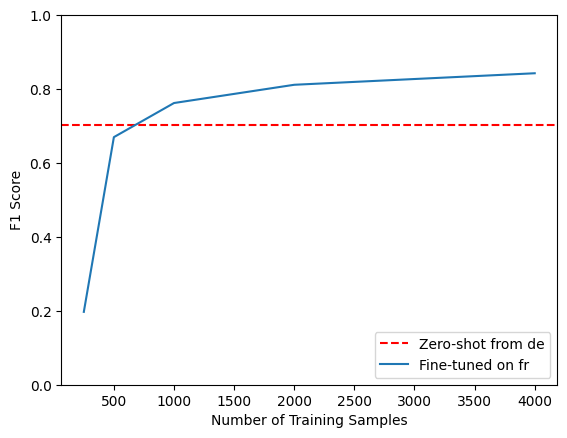

In [60]:
fig, ax = plt.subplots()
ax.axhline(0.703, ls='--', color='r')
metrics_df.set_index('num_samples').plot(ax=ax)
plt.legend(['Zero-shot from de', 'Fine-tuned on fr'], loc='lower right')
plt.ylim((0, 1))
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.show()

훈련 샘플이 약 750개일 때까지 제로샷 전이가 앞서고 그 후에는 프랑스어 미세 튜닝이 독일어에서 미세 튜닝한 때와 비슷한 수준으로 성능이 향상됨

하지만 제로샷 전이를 무시해서는 안됨

도메인 전문가를 고용해 수백 개의 문서를 레이블링하는 비용이 만만치 않음

특히 NER에서 레이블링 과정은 복잡하고 시간이 많이 걸림

다중 언어 학습을 평가하는 마지막 방법은 다국어에서 동시에 미세 튜닝하는 것임

### 4.10.2 다국어에서 동시에 미세 튜닝하기

In [44]:
from datasets import concatenate_datasets

In [51]:
def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [43]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

NameError: name 'panx_fr_encoded' is not defined

In [68]:
panx_de_fr_encoded

DatasetDict({
    validation: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 8580
    })
    test: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 8580
    })
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'labels'],
        num_rows: 17160
    })
})

In [70]:
batch_size = 12

In [71]:
training_args.logging_steps = len(panx_de_fr_encoded['train']) // batch_size
training_args.push_to_hub = True
training_args.output_dir = 'xlm-roberta-base-finetuned-panx-de-fr'

trainer = Trainer(model_init=model_init,
                  args=training_args,
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  tokenizer=xlmr_tokenizer,
                  train_dataset=panx_de_fr_encoded['train'],
                  eval_dataset=panx_de_fr_encoded['validation'])

trainer.train()
trainer.push_to_hub(commit_message='Training completed!')

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/huggingface_hub/repository.py:725: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.12. Please create the repository first using `create_repo(..., exists_ok=True)`.
  warnings.warn(
Cloning https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-de-fr into local empty directory.
/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,No log,0.204629,0.810927
2,0.216300,0.167816,0.846665
3,0.216300,0.163663,0.862141


Upload file pytorch_model.bin:   0%|          | 4.00k/1.03G [00:00<?, ?B/s]

Upload file training_args.bin: 100%|##########| 2.86k/2.86k [00:00<?, ?B/s]

Upload file sentencepiece.bpe.model:   0%|          | 4.00k/4.83M [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-de-fr
   601eb7a..6c9a119  main -> main

To https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-de-fr
   6c9a119..b930533  main -> main



'https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-de-fr/commit/6c9a119c35a3e4115652f39a2d53dc79a04ee778'

In [73]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"[{lang}] 데이터셋에서 [de-fr] 모델의 F1-점수: {f1:.3f}")

Loading cached processed dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-1c80317fa3b1799d.arrow


  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Loading cached processed dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-23b8c1e9392456de.arrow


[de] 데이터셋에서 [de-fr] 모델의 F1-점수: 0.868


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

Loading cached processed dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-8b9d2434e465e150.arrow


[fr] 데이터셋에서 [de-fr] 모델의 F1-점수: 0.856


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Loading cached processed dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-17fc695a07a0ca6e.arrow


[it] 데이터셋에서 [de-fr] 모델의 F1-점수: 0.796


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

[en] 데이터셋에서 [de-fr] 모델의 F1-점수: 0.676


프랑스어 테스트 세트 성능이 이전보다 훨씬 더 좋아져 독일어 테스트 세트 성능과 비슷함

이탈리아어와 영어 성능도 약 10퍼센트 포인트 향상됐음

따라서 다른 언어의 훈련 데이터를 추가해도, 본 적 없는 언어에서 모델의 성능이 향상됨

In [46]:
f1_scores = defaultdict(dict)
f1_scores['de']['de'] = 0.864
f1_scores['de']['fr'] = 0.703
f1_scores['de']['it'] = 0.665
f1_scores['de']['en'] = 0.599

In [49]:
batch_size = 12

training_args = TrainingArguments(
    output_dir='',
    log_level='error',
    num_train_epochs=3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    evaluation_strategy='epoch',  # 에포크가 끝날 때마다 검증 세트에 대한 모델의 예측을 평가
    save_steps=1e6,  # 큰 수로 설정해 훈련 속도를 높임
    weight_decay=0.01,  # 가중치 감쇠 값을 조정
    disable_tqdm=False,
    logging_steps=len(panx_de_encoded['train']) // batch_size,
    push_to_hub=True,
)

In [50]:
corpora = [panx_de_encoded]

# 반복에서 독일어는 제외
for lang in langs[1:]:
    training_args.output_dir = f'xlm-roberta-base-finetuned-panx-{lang}'
    # 단일 언어 말뭉치에서 미세 튜닝
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded['train'].num_rows)
    # 딕셔너리에 F1-점수를 모읍니다.
    f1_scores[lang][lang] = metrics['f1_score'][0]
    # 단일 언어 말뭉치를 corpora 리스트에 추가합니다.
    corpora.append(ds_encoded)

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

/data/heerak/workspace/nlp-with-transformers/xlm-roberta-base-finetuned-panx-fr is already a clone of https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-fr. Make sure you pull the latest changes with `repo.git_pull()`.
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: raki-1203. Use `wandb login --relogin` to force relogin


/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,No log,0.312172,0.796146
2,0.415100,0.274850,0.831160
3,0.415100,0.277689,0.837053


Upload file pytorch_model.bin:   0%|          | 4.00k/1.03G [00:00<?, ?B/s]

Upload file training_args.bin: 100%|##########| 2.80k/2.80k [00:00<?, ?B/s]

Upload file sentencepiece.bpe.model:   0%|          | 4.00k/4.83M [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-fr
   6b40c4f..b464f21  main -> main

To https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-fr
   b464f21..f11965e  main -> main

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/huggingface_hub/repository.py:725: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.12. Please create the repository first using `create_repo(..., exists_ok=True)`.
  warnings.warn(
Cloning https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-it into local empty directory.
/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,No log,0.352689,0.737182
2,0.517300,0.257993,0.791582
3,0.517300,0.247415,0.827025


Upload file pytorch_model.bin:   0%|          | 4.00k/1.03G [00:00<?, ?B/s]

Upload file sentencepiece.bpe.model:   0%|          | 4.00k/4.83M [00:00<?, ?B/s]

Upload file training_args.bin: 100%|##########| 2.80k/2.80k [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-it
   457edf5..bc86911  main -> main

To https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-it
   bc86911..634de6d  main -> main

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/huggingface_hub/repository.py:725: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.12. Please create the repository first using `create_repo(..., exists_ok=True)`.
  warnings.warn(
Cloning https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-en into local empty directory.
/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,No log,0.548670,0.569296
2,0.775000,0.421261,0.683657
3,0.775000,0.385004,0.704762


Upload file pytorch_model.bin:   0%|          | 4.00k/1.03G [00:00<?, ?B/s]

Upload file training_args.bin: 100%|##########| 2.80k/2.80k [00:00<?, ?B/s]

Upload file sentencepiece.bpe.model:   0%|          | 4.00k/4.83M [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-en
   fdff428..7c396eb  main -> main

To https://huggingface.co/Heerak/xlm-roberta-base-finetuned-panx-en
   7c396eb..01e52df  main -> main

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


각 언어 말뭉치에서 미세 튜닝했으니, 모든 언어의 분할을 합쳐서 네 언어로 구성된 다국어 말뭉치를 만듦

concatenate_splits() 함수에 위에서 생성한 말뭉치 리스트를 적용하겠음

In [52]:
corpora_encoded = concatenate_splits(corpora)

Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-eb21a7f581b879b9.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-666852598ec4ab91.arrow
Loading cached shuffled indices for dataset at /home/heerak/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/2fc6b63c5326cc0d1f73060649612889b3a7ed8a6605c91cecdbd228a7158b17/cache-273bdd0c2912bb6a.arrow


In [53]:
training_args.logging_steps = len(corpora_encoded['train']) // batch_size
training_args.output_dir = 'xlm-robereta-base-finetuned-panx-all'

trainer = Trainer(model_init=model_init,
                  args=training_args,
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  tokenizer=xlmr_tokenizer,
                  train_dataset=corpora_encoded['train'],
                  eval_dataset=corpora_encoded['validation'])
trainer.train()
trainer.push_to_hub(commit_message='Training completed!')

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/huggingface_hub/repository.py:725: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.12. Please create the repository first using `create_repo(..., exists_ok=True)`.
  warnings.warn(
Cloning https://huggingface.co/Heerak/xlm-robereta-base-finetuned-panx-all into local empty directory.
/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,F1
1,No log,0.204629,0.810927
2,0.216300,0.167816,0.846665
3,0.216300,0.163663,0.862141


Upload file pytorch_model.bin:   0%|          | 4.00k/1.03G [00:00<?, ?B/s]

Upload file sentencepiece.bpe.model:   0%|          | 4.00k/4.83M [00:00<?, ?B/s]

Upload file training_args.bin: 100%|##########| 2.80k/2.80k [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/Heerak/xlm-robereta-base-finetuned-panx-all
   1ac7849..3aee3ea  main -> main

To https://huggingface.co/Heerak/xlm-robereta-base-finetuned-panx-all
   3aee3ea..ba12ab1  main -> main



'https://huggingface.co/Heerak/xlm-robereta-base-finetuned-panx-all/commit/3aee3ea3f2ca3838bd473985ffacad26b0bd89ef'

각 언어의 테스트 세트에 대한 예측을 생성하겠음

다중 언어 학습이 실제로 얼마나 잘 작동하는지 통찰을 얻게 됨

f1_scores 딕셔너리에 F1-점수를 저장하고 다중 언어 실험의 주요 결과를 요약한 DataFrame 을 만듦

In [54]:
for idx, lang in enumerate(langs):
    f1_scores['all'][lang] = get_f1_score(trainer, corpora[idx]['test'])
    
scores_data = {'de': f1_scores['de'],
               'each': {lang: f1_scores[lang][lang] for lang in langs},
               'all': f1_scores['all']}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index='Fine-tune on', columns='Evaluated on', inplace=True)

f1_scores_df

/data/heerak/workspace/venv3.8/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.8640,0.7030,0.6650,0.5990
each,0.8640,0.8385,0.8135,0.7169
all,0.8679,0.8565,0.7965,0.6758


wandb: Waiting for W&B process to finish... (success).


이 출력 결과는 다음과 같은 결과를 알려줌

- 다중 언어 학습은 성능상 큰 이득을 제공함<br>특히 유사한 언어군에서 데이터가 부족한 언어로 교차 언어 전이를 수행할 때 큰 이득을 얻게 됨<br>실험 결과에서 all 열은 독일어, 프랑스어, 이탈리아어 성능이 비슷함<br>이는 이 언어들이 영어보다 서로 간에 더 비슷함을 나타냄
- 일반적인 전략으로, 특히 일본어처럼 다른 종류의 텍스트를 다룰 때는 한 어족(language family)내에서 교차 언어 전이에 초점을 맞추는 것이 좋음

## 4.11 모델 위젯 사용하기

이 장에서 미세 튜닝한 몇 개의 모델을 허브에 올렸음

로컬에 있는 모델로 pipeline() 함수를 사용할 수 있지만 허브가 제공하는 위젯으로도 같은 작업이 가능

<img alt="A Hub widget" caption="Example of a widget on the Hugging Face Hub" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter04_ner-widget.png?raw=1" id="ner-widget"/>  

## 4.12 결론

이 장에서 100개 언어에서 사전 훈련된 트랜스포머 모델 XLM-R 로 다국어 말뭉치가 있는 NLP 작업을 처리했음

독일어에서 프랑스어로 교차 언어 전이는 미세 튜닝에 사용할 레이블링된 샘플이 적을 때만 경쟁력 있는 방법이라는 사실을 확인했음

교차 언어 전이는 일반적으로 타깃 언어가 베이스 모델의 미세 튜닝에 사용한 언어와 크게 다르거나 사전 훈련에 사용된 100개 언어 중 하나가 아니라면 좋은 성능을 내지 못함

MAD-X 같은 최근 연구는 이렇게 데이터가 부족한 상황을 위해 설계됐음

MAD-X 는 트랜스포머스 위에 구축됐으므로, 이용하고 싶다면 이 장의 코드를 조금만 바꾸면 됨